In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from pathlib import Path 
data_path = Path(".")/'data_1024.csv'

In [3]:
df = pd.read_csv(data_path, low_memory=False, sep="\t" , index_col=["Driver_ID"])

In [4]:
df.head()

,Distance_Feature,Speeding_Feature
Driver_ID,,
3423311935,71.24,28.0
3423313212,52.53,25.0
3423313724,64.54,27.0
3423311373,55.69,22.0
3423310999,54.58,25.0


In [6]:
df.iloc[:,0]

Driver_ID
3423311935     71.24
3423313212     52.53
3423313724     64.54
3423311373     55.69
3423310999     54.58
3423313857     41.91
3423312432     58.64
3423311434     52.02
3423311328     31.25
3423312488     44.31
3423311254     49.35
3423312943     58.07
3423312536     44.22
3423311542     55.73
3423312176     46.63
3423314176     52.97
3423314202     46.25
3423311346     51.55
3423310666     57.05
3423313527     58.45
3423312182     43.42
3423313590     55.68
3423312268     55.15
3423314255     43.84
3423311976     59.26
3423312669     37.14
3423310697     64.30
3423312113     45.75
3423313343     45.97
3423311431     56.04
               ...  
3423313079    180.29
3423312932    222.08
3423311728    165.10
3423314434    212.75
3423311292    170.64
3423314315    196.20
3423310889    189.99
3423310851    208.96
3423313381    219.39
3423311448    188.25
3423311551    187.13
3423313834    187.28
3423312123    192.74
3423310590    211.20
3423312146    189.88
3423312648    165.58
342

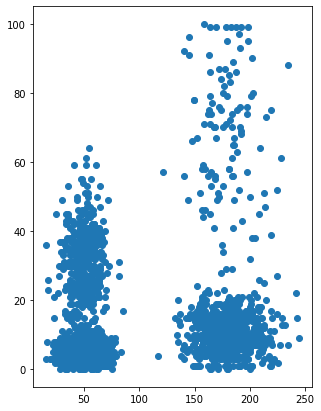

In [15]:
plt.figure(figsize=(5,7))
plt.scatter(df.iloc[:,0],df.iloc[:,1])

In [17]:
X= StandardScaler().fit_transform(df)


In [18]:
X[1]

array([-0.43977285,  1.04174351])

In [19]:
kmeans = KMeans(n_clusters=2).fit(X)

Text(0.5, 1.0, 'Incorrect Number of Blobs')

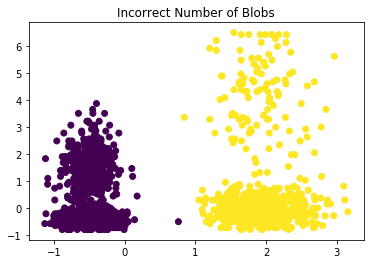

In [20]:
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

In [22]:
kmeans.predict(np.array([[-0.432537285,  0.04174351],
                     [-1.432537285,  2.04174351],
                     [-1.432537285,  2.04174351]]))

array([0, 0, 0], dtype=int32)

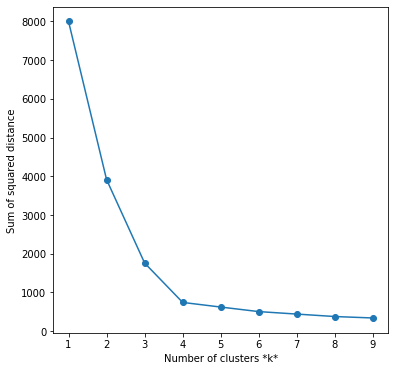

In [30]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)  
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');